MAI24MA                                                                          -                                                                                 Nour Alasadi

# Dataanalys: Diamonds Dataset 💎
**Företag: Guldfynd – Strategisk utvärdering av diamanter**

Denna notebook analyserar datasetet `diamonds.csv` för att ge insikter om hur olika attribut (såsom vikt, färg, slipning och klarhet) påverkar diamantens pris.
Målet är att skapa tydlig data storytelling och ge rekommendationer till Guldfynd kring potentiella investeringar.

## Syfte:
- Utforska korrelationer mellan pris och andra attribut
- Visualisera trender baserat på slipkvalitet (cut)
- Förmedla tydliga insikter till beslutsfattare

#### Library imports

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
data = pd.read_csv('diamonds.csv')

# Sorting data - from worst to best.
cut_order     = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_order   = ["J", "I", "H", "G", "F", "E", "D"]
clarity_order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

### **Korrelation 1: `Cut` & `Price`**

In [13]:
correlations = [("cut", cut, data[data["cut"] == cut][["price", "carat", "depth", "table", "x", "y", "z"]])
         for cut in cut_order]

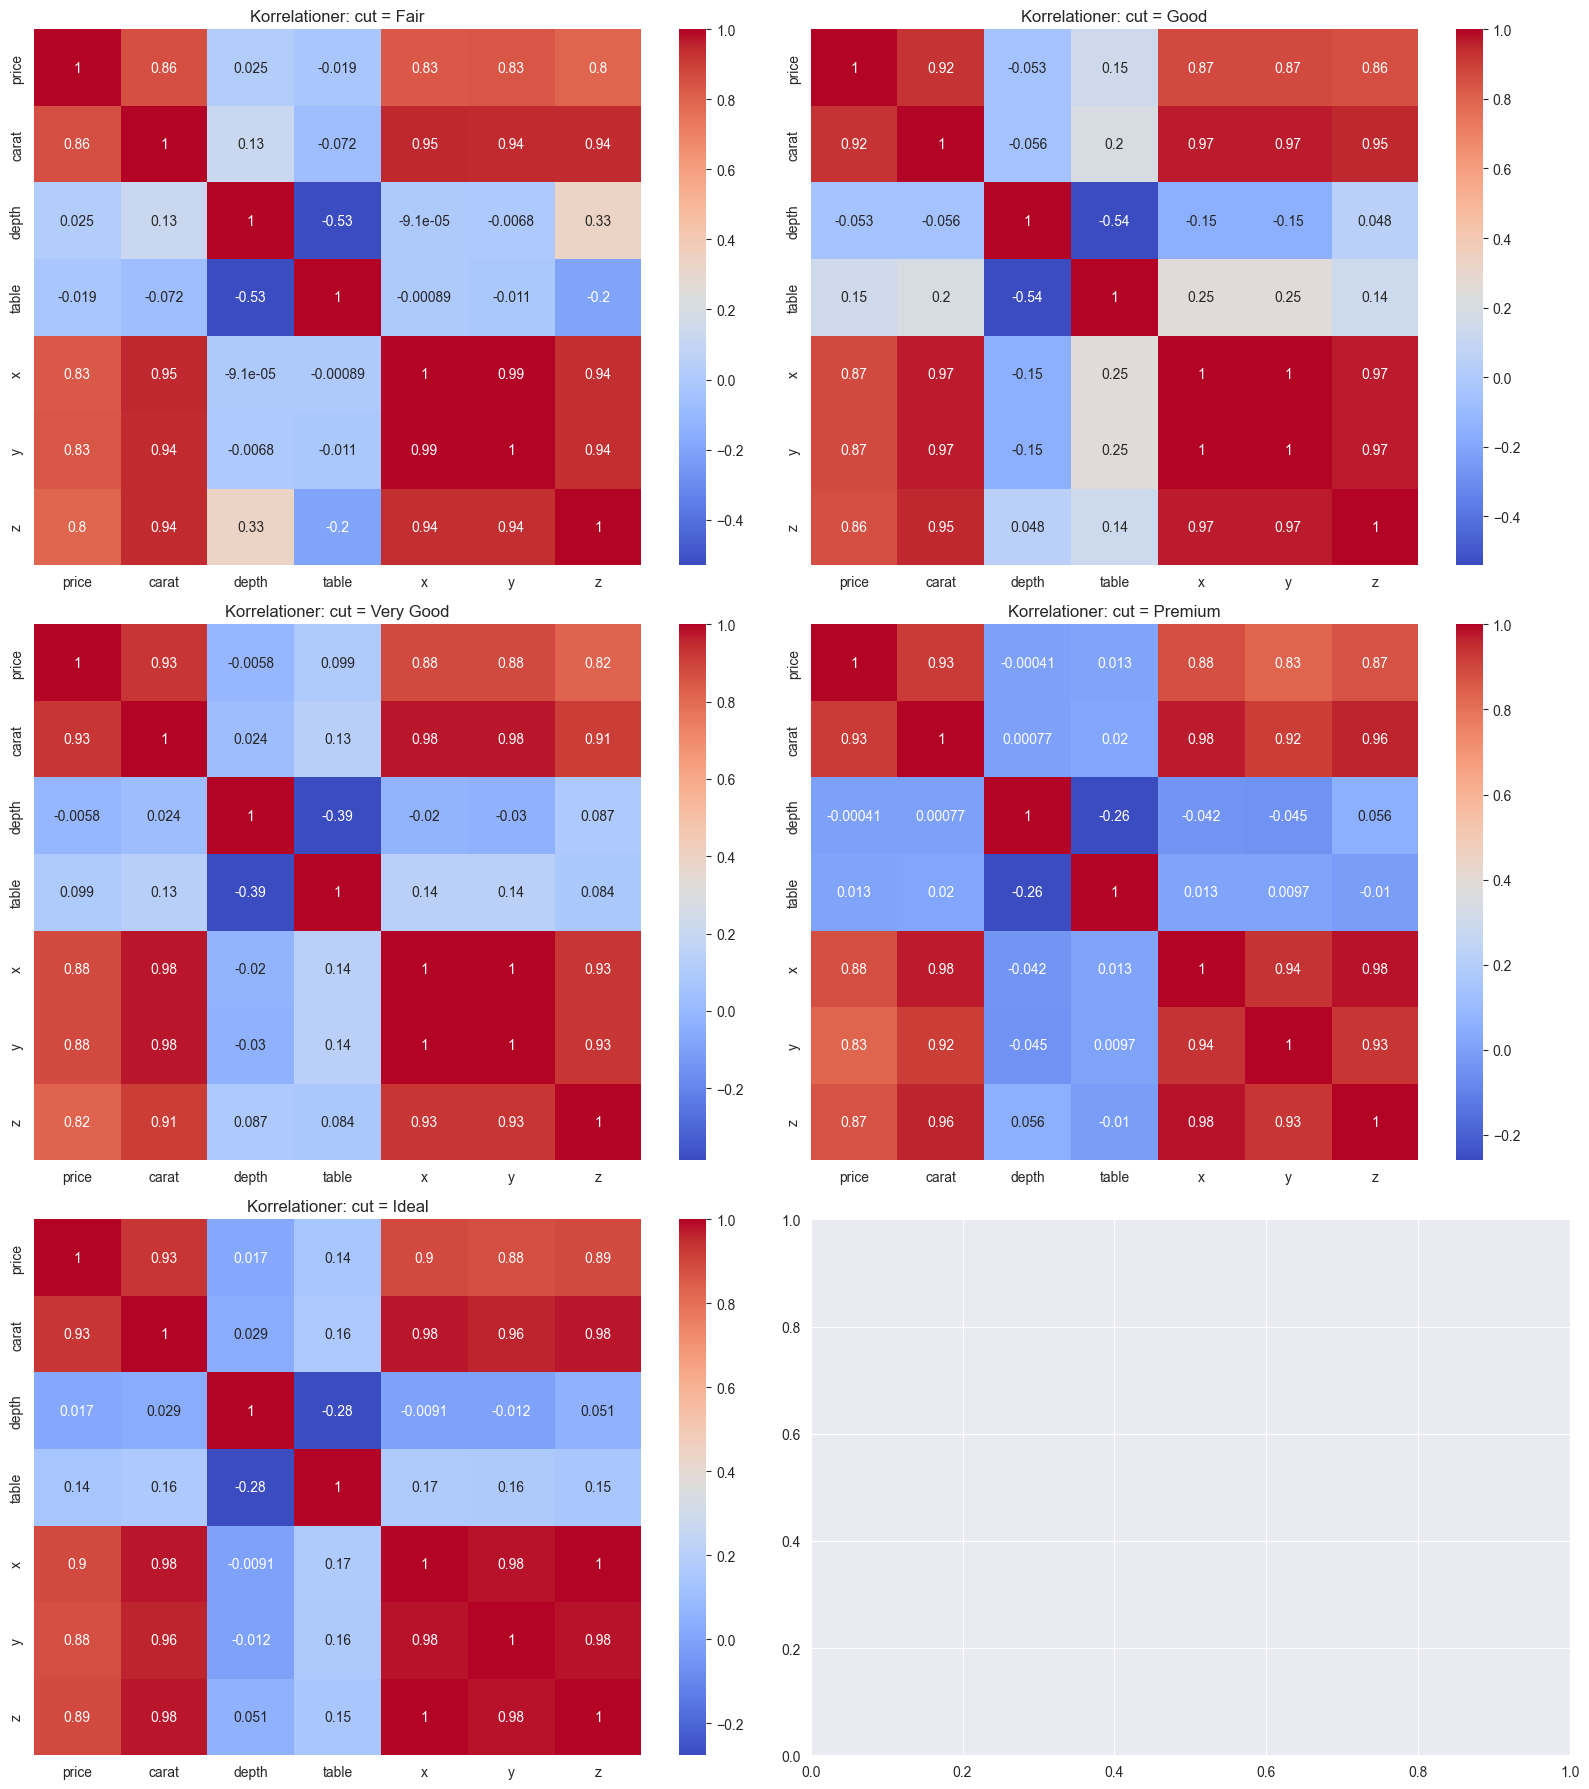

In [135]:
# Plot: heatmaps eg from Linus:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
for data, ax in zip(correlations, axs.flatten()):
    sns.heatmap(data[2].corr(), annot=True, cmap="coolwarm", ax=ax)
    ax.set_title(f"Korrelationer: {data[0]} = {data[1]}")

plt.tight_layout()
plt.show()

### **Utredning 1: `Cut` & `Price` Korrelation**
- Man kan dra slutsatsen att det finns en ganska liten korrelation mellan Price & Cut.
- Största korrelationer finner sig mest inom `Very Good`, `Premium` och `Ideal`
##### Men det är lite svårt att läsa data utav heatmaps.
##### Testar med en diagram med användningen av `Cut()` method i pandas:

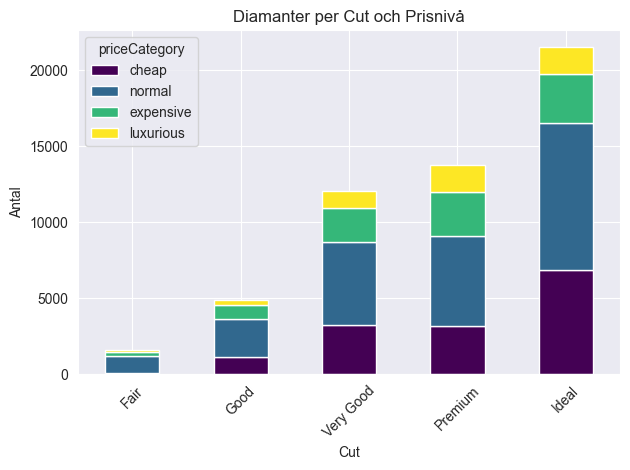

In [14]:
data = pd.read_csv("diamonds.csv") # Load data
df = pd.DataFrame(data)

price_bins = [0, 1000, 5000, 10000, 20000] # Categorize prices
price_labels = ["cheap", "normal", "expensive", "luxurious"] # Price labes as categories

df["priceCategory"] = pd.cut(df["price"], bins=price_bins, labels=price_labels) # Setting Price Category based on loaded df and cut for price_bins and labes

df["cut"] = pd.Categorical(df["cut"], categories=cut_order, ordered=True) # Using Categorical() to sort by worst to best
df["priceCategory"] = pd.Categorical(df["priceCategory"], categories=price_labels, ordered=True)

cut_price_table = pd.crosstab(df["cut"], df["priceCategory"]) # Group analysis how cut effects price

# Plot:
cut_price_table.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Diamanter per Cut och Prisnivå")
plt.ylabel("Antal")
plt.xlabel("Cut")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Med hjälp av diagrammet är det lite enklare att läsa och stämma att Utredning 1: `Cut` & `Price` correlation stämmer väl.
- **Ideal och Premium** står för nästan alla *expensive* och *luxurious* diamanter.
- **Fair och Good** finns nästan uteslutande i *cheap* och *normal* priskategorier.

________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________

### **Korrelation 2:`Clarity` & `Price`**

##### 1. Skapar en korrelation mellan `Clarity` & `Price`:

In [15]:
corrs = [("clarity", clarity, data[data["clarity"] == clarity][["price", "carat", "depth", "table", "x", "y", "z"]])
         for clarity in clarity_order]

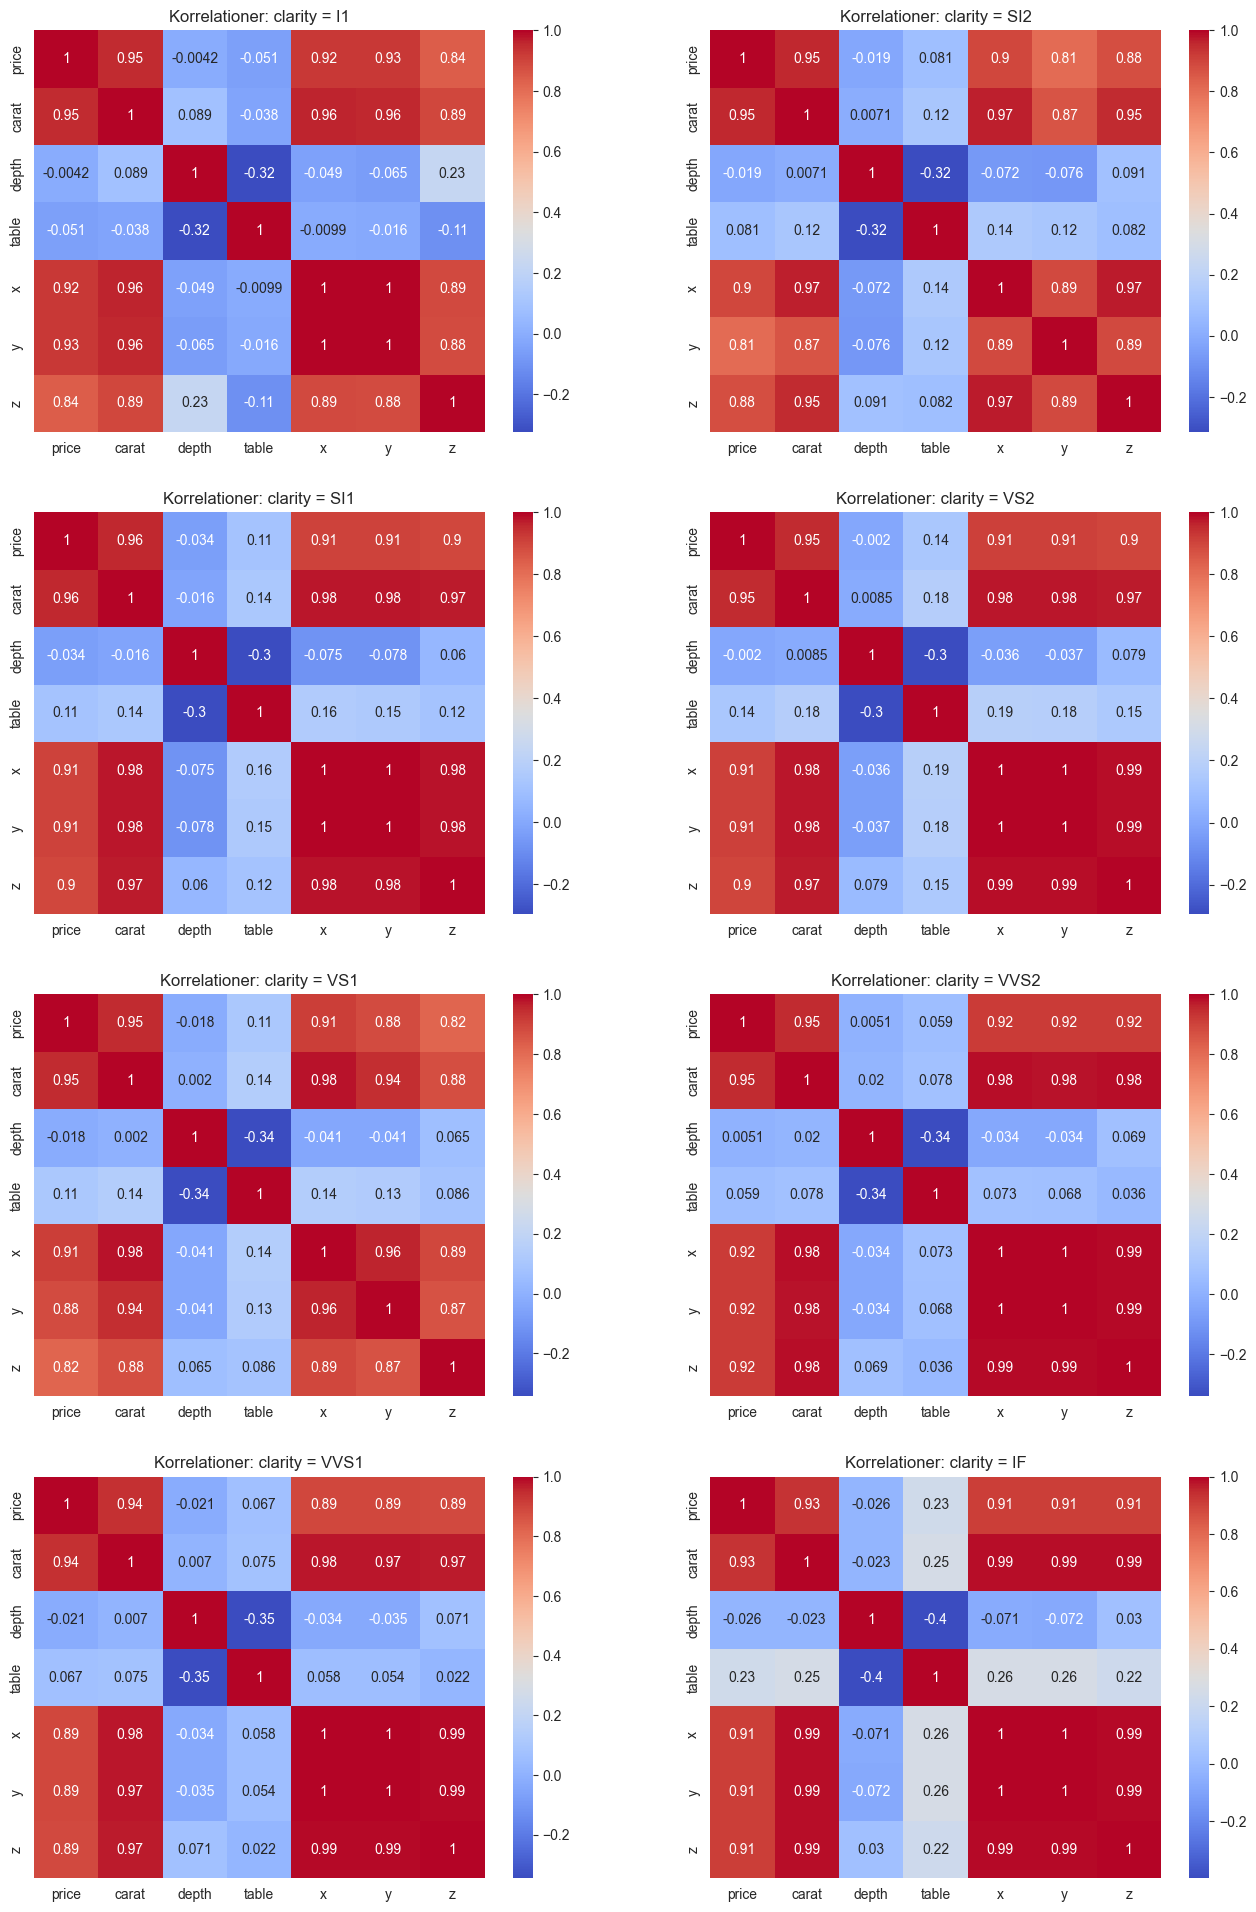

In [5]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))

for data, ax in zip(corrs, axs.flatten()):
    sns.heatmap(data[2].corr(), annot=True, cmap="coolwarm", ax=ax)
    ax.set_title(f"Korrelationer: {data[0]} = {data[1]}")

### Utredning 2: `Clarity` & `Price` korrelation:
- Till skillnad från Cut kan vi se en mycket tydligare och konsekvent korrelation mellan carat & price oavsett vilken clarity-nivå.
- Däremot är korrelationsstyrkan mellan clarity och övriga mått som depth och table är mycket svag eller obefintlig.
clarity i sig påverkar inte strukturvariablerna `x, y, z` men kan indirekt påverka priset via kvalitet.
Därför rekommenderas det att använda clarity som en `kategorisk analysdimension` – men inte som korrelationskälla.

##### **Vi analyserar en tydlig boxplot mellan `Clarity` & `Price` Korrelation:**

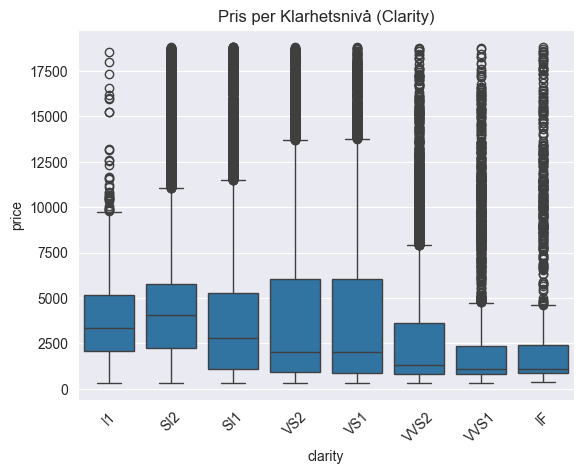

In [6]:
sns.boxplot(data=df, x="clarity", y="price", order=clarity_order)
plt.title("Pris per Klarhetsnivå (Clarity)")
plt.xticks(rotation=45)
plt.show()

### Utredning 2: `Clarity` & `Price` korrelation: (`Boxplot`)
Boxploten visar hur diamantpriset är fördelat inom varje klarhetsnivå (från I1 (semst) till IF (bäst).

#### Observationer:
- Medianpriset ligger förvånansvärt **jämnt** över clarity-nivåerna.
- Spridningen (interkvartilavståndet) är bred inom varje nivå, vilket tyder på att andra variabler (t.ex. carat) driver priset mer.
- Vissa lågklarhetskategorier som `SI2`, `SI1`, `VS2` innehåller diamanter i samma eller högre prisnivå som `IF`.
- Det finns **många outliers** (särskilt uppåt) i alla clarity-nivåer, vilket ytterligare tyder på att pris inte **enbart** beror på klarhet.
#### Vi gör en `Cut()` method för att säkerställa vad kan det vara som driver priset i `Clarity`

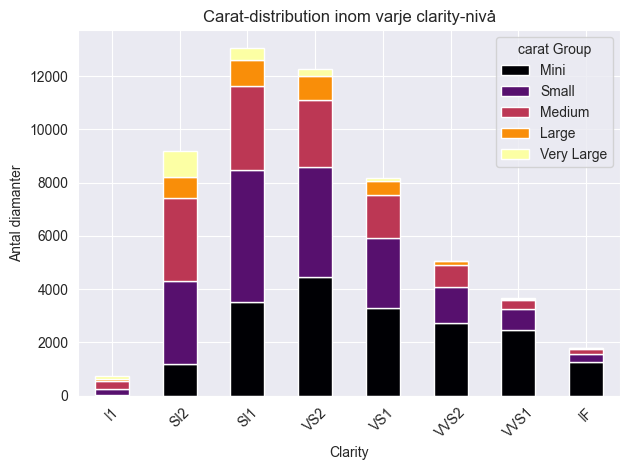

In [21]:
# Sorting worst to best:
df["clarity"] = pd.Categorical(df["clarity"], categories=clarity_order, ordered=True)

# Vi gör binning av carat inom varje clarity-nivå
df["carat Group"] = pd.cut(df["carat"], bins=[0, 0.5, 1.0, 1.5, 2.0, 5.0], labels=["Mini", "Small", "Medium", "Large", "Very Large"])
df["priceCategory"] = pd.Categorical(df["priceCategory"], categories=price_labels, ordered=True)

# Gruppvis analys: hur carat fördelas inom varje clarity
carat_clarity_table = pd.crosstab(df["clarity"], df["carat Group"])

# Plot
carat_clarity_table.plot(kind="bar", stacked=True, colormap="inferno")
plt.title("Carat-distribution inom varje clarity-nivå")
plt.ylabel("Antal diamanter")
plt.xlabel("Clarity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Slutlig utredning 2: `Price` & `Clarity` Korrelation**
- **Horisontell analys (per clarity):** Visar `SI2` eller `I1` innehåller många `Very Large`? **Då förklaras höga priser trots låg klarhet.**
- **Vertikal analys (per caratGroup):** Visar att `IF` nästan saknar stora carat? **Då förklaras varför priset inte nödvändigtvis är högt där.**

________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________

### Korrelation 3: `Color` & `Price`:
- Utreder om det finns korrelationer mellan pris och färgen på diamanterna.

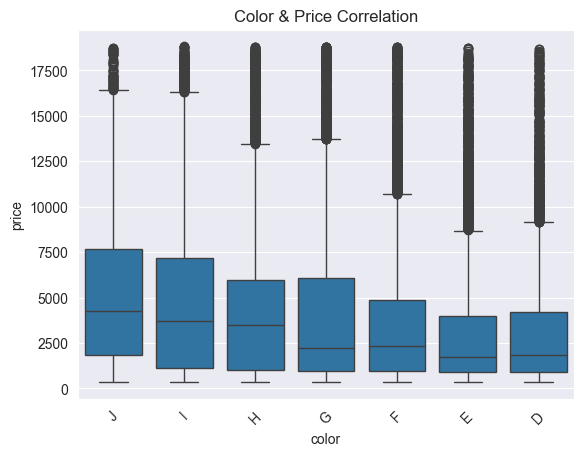

In [8]:
sns.boxplot(data=df, x="color", y="price", order=color_order)
plt.title("Color & Price Correlation")
plt.xticks(rotation=45)
plt.show()

### Utredning 3: `Color` & `Price` Korrelation:
Färgklasserna visar spridning i pris, men det finns ingen tydlig linjär ökning/minskning. Detta tyder på att färg inte är en huvudfaktor för pris.

________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________

### Korrelation 4: `Clarity` & `Price`

In [22]:
correlation = df["carat"].corr(df["price"])
print(f"Korrelation mellan carat och pris: {correlation:.2f}")

Korrelation mellan carat och pris: 0.92


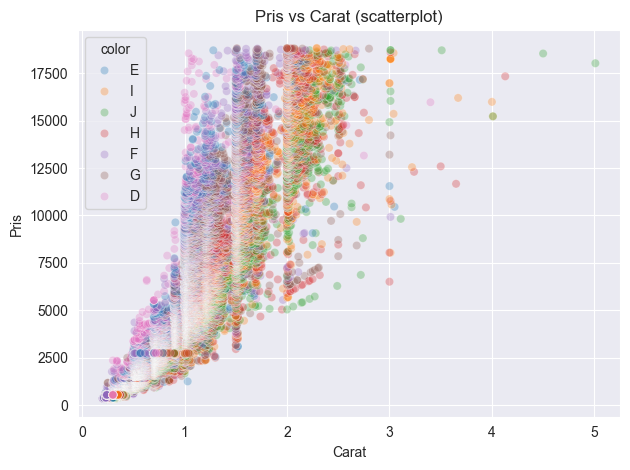

In [24]:
sns.scatterplot(data=df, x="carat", y="price", alpha=0.3, hue="clarity")
plt.title("Pris vs Carat (scatterplot)")
plt.xlabel("Carat")
plt.ylabel("Pris")
plt.tight_layout()
plt.show()

### Utredning 4: Carat & Price Correlation:
Scatterplotten visar ett mycket starkt samband mellan vikt (carat) och pris – ju tyngre diamanten är, desto högre är priset. Det bekräftar att carat är den enskilt mest prisdrivande faktorn.
Samtidigt visar färgkodningen enligt clarity att även klarhet påverkar priset – men på ett mer selektivt sätt. Vi observerar:

De högsta priserna i varje viktklass tillhör oftast de med högsta klarhet: `IF` och `VVS1`.

Trots låg vikt (under **1 carat**) finns det vissa diamanter med **mycket högt pris**, och dessa tillhör nästan uteslutande de **högsta clarity-kategorierna**.
Clarity fungerar därmed som en filterfaktor: ju bättre klarhet, desto högre pris för samma carat. Det betyder att klarhet inte har lika stark generell korrelation som carat, men har hög prisdifferens inom samma viktintervall.

Det är alltså kombinationen av `hög clarity` + `låg carat` som ibland skapar överraskande **höga priser** – detta är särskilt tydligt i det övre vänstra hörnet av `catterplotten`.


________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________

# 💎 Slutsats: Vad påverkar diamantens pris?

- Den mest prispåverkande faktorn är **carat (vikten)** med en stark positiv korrelation.
- Kvalitetsattribut som **cut** och **clarity** påverkar också priset, men inte lika tydligt.
- Clarity påverkar främst genom att filtrera storlekar: t.ex. IF förekommer nästan bara i små vikter.
- `cut()`-analyser visar att högre cut-kvalitet (Ideal) ofta har större andel dyra diamanter.
- Kombinationen `hög carat` + `hög clarity` => `högst Pris Korrelation`.

Därför bör Guldfynd i första hand använda **carat** & **clarity** som priskalkylens bas, med justeringar för clarity och cut.